# Using Plots to Visualize College Majors

In this project we will be using plots to create visualizations for job outcomes of certain college majors between 2010 and 2012. The data was originally released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), though we'll be using a cleaned version from the [Github](https://github.com/fivethirtyeight/data/tree/master/college-majors) by FiveThirtyEight. The Github also includes more information on each column of this data set.

## Overview

To begin, we'll import some important libraries, read in our data, and take a quick look at some of the information.

In [1]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
# So our plots are displayed inline, we'll use some Jupyter magic
%matplotlib inline

# We'll read our file into a dataframe and view the first row
recent_grads = pd.read_csv(r'C:\Users\Green Miracle\csv files\recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

We can see above that most of the columns contain numeric data. This will make plotting and comparing our data easy.

Let's get an idea of how the our data is structured by viewing the first few rows. We'll do this using `DataFrame.head()`.

In [2]:
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


Every row appears to be a different major, ranked by the Median pay, with the highest paying majors at the top.

Now let's take a quick look at the statistics of our data frame. 

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


With these statistics, I already notice that there are rows with missing information. Matplotlib requires that every row of values we pass contain matching lengths, so we'll need to remove any rows with missing values.

In [4]:
# Let's first assign the current number of rows to a variable
raw_data_count = recent_grads.shape[0]
# We'll remove the rows
recent_grads.dropna(inplace=True)
# Find the new number of rows
cleaned_data_count = recent_grads.shape[0]

# And now we'll compare to find the number of rows we removed
print('Rows Removed:', raw_data_count - cleaned_data_count)

Rows Removed: 1


Only one row contained missing values, and was removed.

## Scatter Plots

We can now begin plotting our data to answer some of our questions. We'll begin with scatter plots to find out how certain columns affect the others.

(0.0, 3000.0)

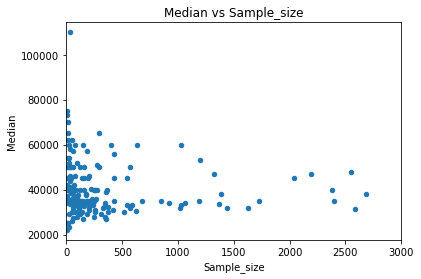

In [5]:
ax = recent_grads.plot('Sample_size', 'Median', kind='scatter')
ax.set_title('Median vs Sample_size')
ax.set_xlim(0, 3000)

This plot seems to suggest that the more popular majors are more rounded into a smaller dispersion compared to less popular majors. The majors with the smallest sample sizes contain both the smallest and the highest paying medians.

(0.0, 3000.0)

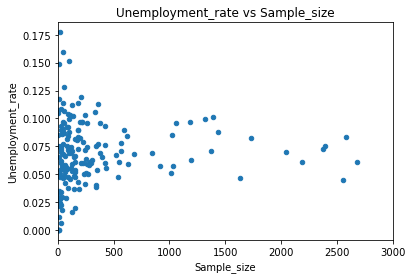

In [6]:
ax = recent_grads.plot('Sample_size', 'Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs Sample_size')
ax.set_xlim(0, 3000)

Unemployment rate for the most popular majors seem to average in the middle compared to less popular majors. Less popular majors range anywhere from 0% - 1.75%, while popular majors range 0.5% - 1%.

(20000.0, 80000.0)

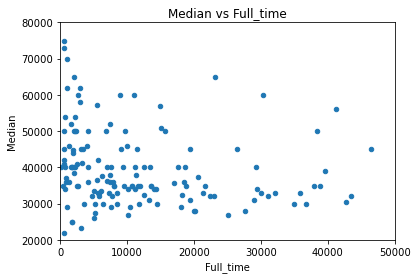

In [7]:
ax = recent_grads.plot('Full_time', 'Median', kind='scatter')
ax.set_title('Median vs Full_time')
ax.set_xlim(0, 50000)
ax.set_ylim(20000, 80000)

The greater the number of full time jobs, the greater the chance of a median pay less than 40,000. Full time jobs under 15,000 tend to have a greater rate of pay compared to those with more full time jobs.

Text(0.5, 1.0, 'Unemployment_rate vs ShareWomen')

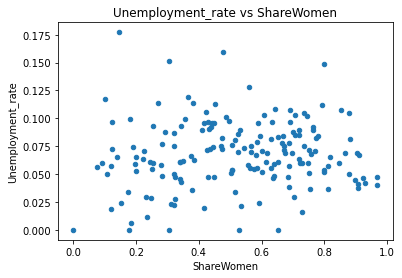

In [8]:
ax = recent_grads.plot('ShareWomen', 'Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs ShareWomen')

There is no correlation between the percent of women to men in a major and the unemployment rate.

Text(0.5, 1.0, 'Median vs ShareWomen')

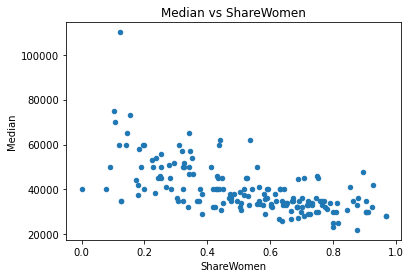

In [9]:
ax = recent_grads.plot('ShareWomen', 'Median', kind='scatter')
ax.set_title('Median vs ShareWomen')

The greater the number of women to men in a job, the less the job tends to pay. The jobs with the greatest number of females has the smallest median of pay, while the jobs with the fewest women to men make the greatest median of pay.

### Scatter Plot Conclusions

From these scatter plots, we can attempt to answer a couple questions:
* The more popular the major, the less chance of having a high median of pay
* The higher the ratio of women to men in a subject, the smaller the median of pay
* Majors that have jobs with less than 15,000 full time positions have the greatest chance for pay higher than $40,000

## Histograms

Now let's take a look at a couple different histogram plots. These will allow us to view the distribution of certain columns.

Text(0.5, 0, 'Sample_size')

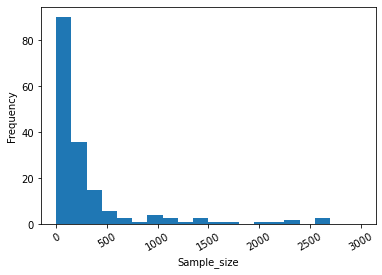

In [10]:
ax = recent_grads['Sample_size'].plot(kind='hist', rot=30, bins=20, range=(0, 3000))
ax.set_xlabel('Sample_size')

More than 75% of all majors contain a sample_size under 250.

Text(0.5, 0, 'Median')

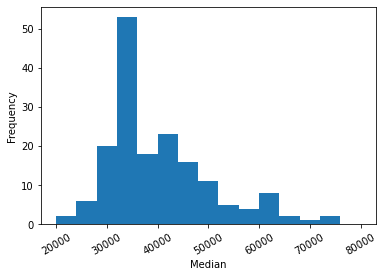

In [11]:
ax = recent_grads['Median'].plot(kind='hist', rot=30, bins=15, range=(20000, 80000))
ax.set_xlabel('Median')

Around 60% of all majors have a median pay of 25000 - 45000.

Text(0.5, 1.0, 'Employed Zoomed')

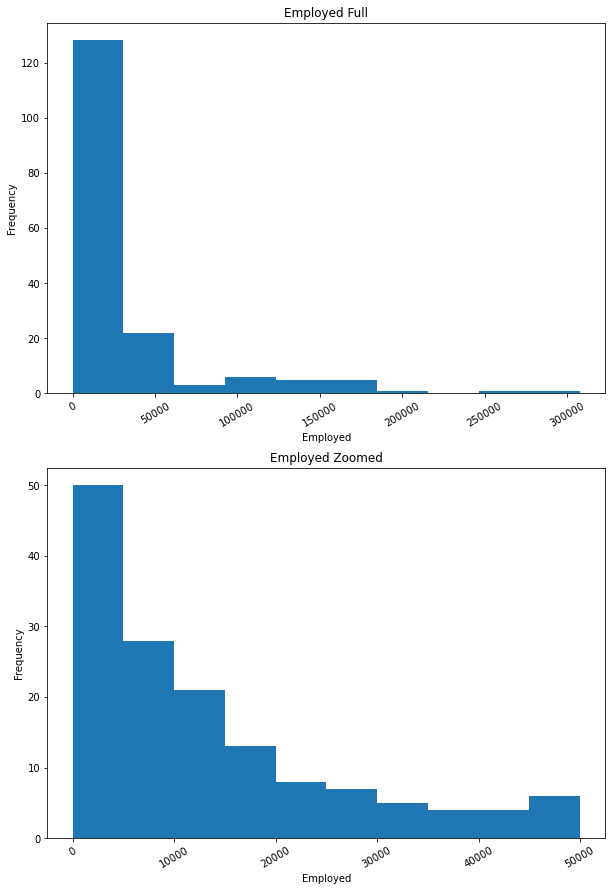

In [12]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(2, 1, 1)
ax1 = recent_grads['Employed'].plot(kind='hist', rot=30)
ax1.set_xlabel('Employed')
ax1.set_title('Employed Full')

ax2 = fig.add_subplot(2, 1, 2)
ax2 = recent_grads['Employed'].plot(kind='hist', rot=30, range=(0, 50000))
ax2.set_xlabel('Employed')
ax2.set_title('Employed Zoomed')

Around 50% of all majors contain 10,000 or less employed job positions.

Text(0.5, 0, 'Full_time')

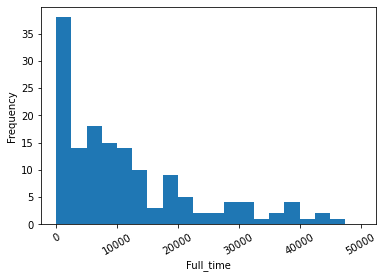

In [13]:
ax = recent_grads['Full_time'].plot(kind='hist', rot=30, bins=20, range=(0, 50000))
ax.set_xlabel('Full_time')

Around 50% of all majors contain 10,000 or less full time job positions.

Text(0.5, 0, 'ShareWomen')

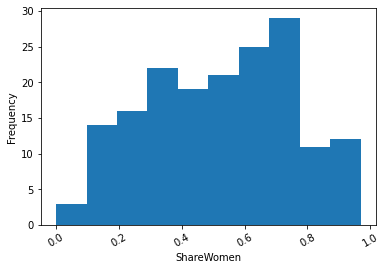

In [14]:
ax = recent_grads['ShareWomen'].plot(kind='hist', rot=30, bins=10)
ax.set_xlabel('ShareWomen')

Over 40% of all majors consist of 60% or more women.

Text(0.5, 0, 'Unemployment_rate')

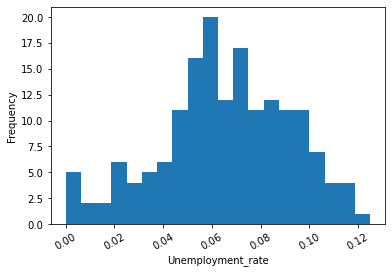

In [15]:
ax = recent_grads['Unemployment_rate'].plot(kind='hist', rot=30, bins=20, range=(0, 0.125))
ax.set_xlabel('Unemployment_rate')

More than 50% of all majors contain an unemployment rate between 5% and 7%.

Text(0.5, 0, 'Men')

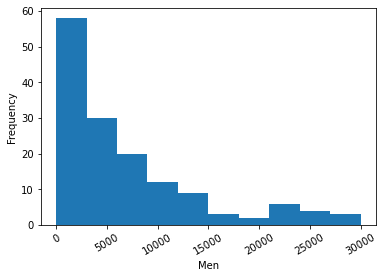

In [16]:
ax = recent_grads['Men'].plot(kind='hist', rot=30, bins=10, range=(0, 30000))
ax.set_xlabel('Men')

Around 50% of all majors have 5,000 men or less.

Text(0.5, 0, 'Women')

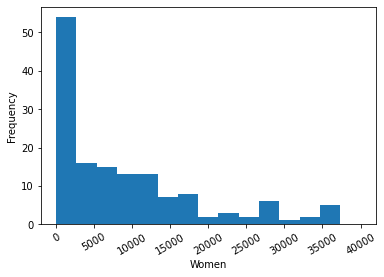

In [17]:
ax = recent_grads['Women'].plot(kind='hist', rot=30, bins=15, range=(0, 40000))
ax.set_xlabel('Women')

Around 40% of all majors have 5,000 women or less.

## Scatter Matrix Plot

We can combine our histograms and scatter plots into a scatter matrix plot to explore potential relationships and distributions simultaneously. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160AF4AEDC0>,
      dtype=object)

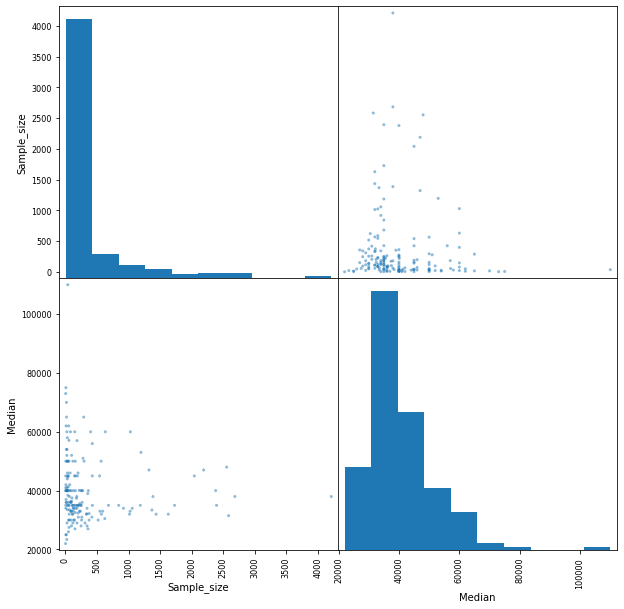

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10, 10), grid=True)

This plot suggests that the majority of majors have a median of pay around 40000 and a sample size under 500.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160AF812C40>,
      dtype=object)

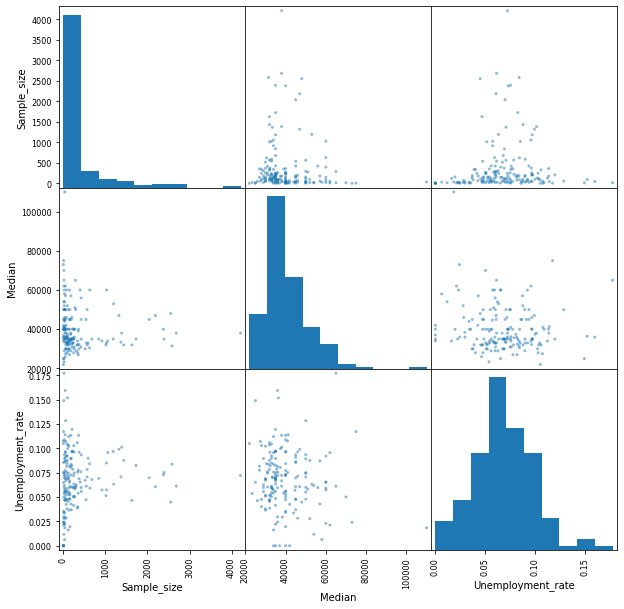

In [19]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10, 10), grid=True)

While unemployment rate for all majors averages around 2.5% and 10%, the majority of these majors have a sample size of less than 500. As sample size increases, the unemployment rate averages out at around 7.5%.

Unemployment rate and the median of pay doesn't have much correlation. 

## Bar Plots

We can use now take a look at a few bar plots to get an idea of how a given set of rows compares to another. We'll compare the first 10 rows of our data set to the last 10 rows to see how information is swayed for the highest paid and least paid jobs.

Text(0.5, 1.0, 'Percent of Women in highest paying jobs')

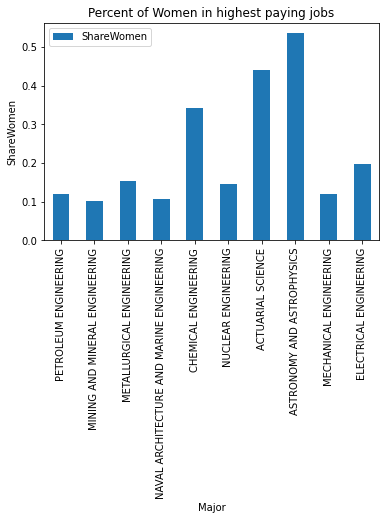

In [25]:
recent_grads.head(10).plot.bar(x='Major', y='ShareWomen')
plt.ylabel('ShareWomen')
plt.title('Percent of Women in highest paying jobs')

Text(0.5, 1.0, 'Percent of Women in lowest paying jobs')

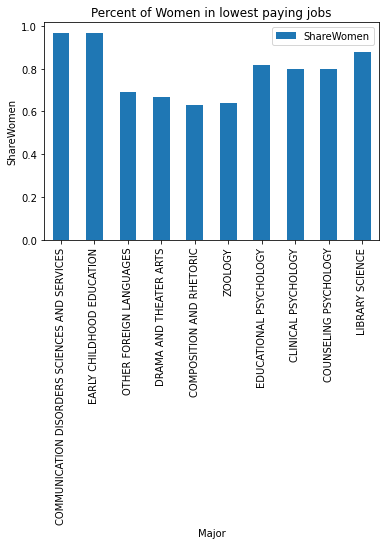

In [27]:
recent_grads.tail(10).plot.bar(x='Major', y='ShareWomen')
plt.ylabel('ShareWomen')
plt.title('Percent of Women in lowest paying jobs')

From these two graphs, we can see that the percent of women greatly increased for the jobs paying the least. The higher paying jobs, however, seem to be jobs that are considered to be more dangerous. These jobs are likely paid more and dominanted by men due to their dangerous nature.

Text(0.5, 1.0, 'Percent unemployed in highest paying jobs')

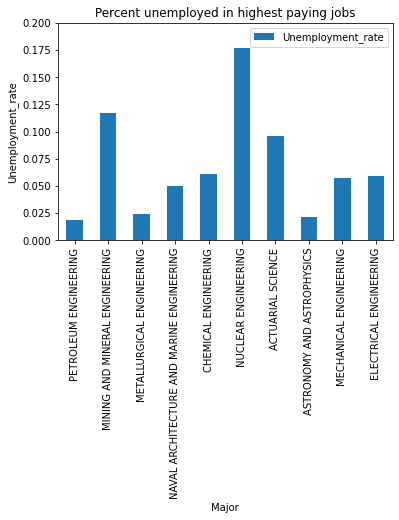

In [36]:
recent_grads.head(10).plot.bar(x='Major', y='Unemployment_rate')
plt.ylim(0, 0.200)
plt.ylabel('Unemployment_rate')
plt.title('Percent unemployed in highest paying jobs')

Text(0.5, 1.0, 'Percent unemployed in lowest paying jobs')

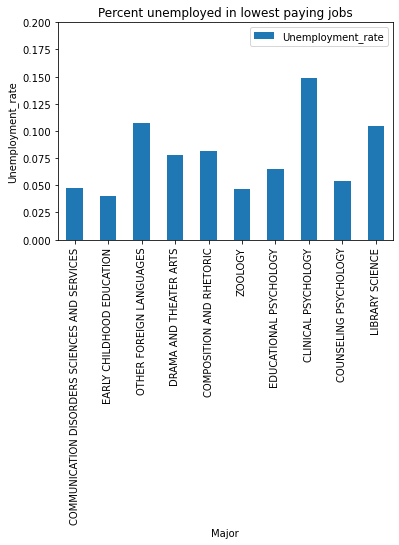

In [37]:
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate')
plt.ylim(0, 0.200)
plt.ylabel('Unemployment_rate')
plt.title('Percent unemployed in lowest paying jobs')

These results tell me that the lowest paid jobs have a more averaged unemployment rate. It sits right around the average of 7.5%. The highest paid jobs, however, have a greater fluctuation, and contain both the smallest and highest unemployment rates compared to the lowest paid jobs.

## Conclusion

Through our analysis of our data through several forms of plots, we were able to answer several questions.
* The smallest sample sizes contain more median pay dispersion, and have both the greatest and lowest paid jobs.
* Men tend to take on more dangerous jobs, and thus those jobs dominated by men have a higher rate of pay.
* Jobs with more full time positions slightly increase in average pay, but the highest paid jobs have fewer full time positions.
* Unemployment rate averages out at 7.5% as sample size increases.